In [8]:
import math
import numpy as np
import pandas as pd
import pints
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 24})
plt.rc('lines', linewidth=5)
from Newton_model_numba import wrappedNewton, newtonRaphsonFT
from Newton_cap_model_Numba import newtonRaphsonCap, wrappedNewtonCap

In [9]:
# # specifing files and model 
# # specifing data location and folder for outputs

# Phfolder = ['ph4 2m nacl 25oC','ph5 2m nacl 25oC','ph6 2m nacl 25oC','ph7 2m nacl 25oC','ph8 2m nacl 25oC','ph9 2m nacl 25oC']

# data_file_names = ['9_1b_cv_current_downsampled_0', '9 150_1_cv_current_downsampled_0',
#                     '9 150_1_cv_current_downsampled_0', '9 150_1_cv_current_downsampled_0',
#                     '9 150_1_cv_current_downsampled_0', '9 150_1_cv_current_downsampled_0']

# experiment_folder = ['9_1b', '9 150_1',
#                      '9 150_1', '9 150_1',
#                      '9 150_1', '9 150_1']

# set_folder = '9 150_1'

# Ph = ['Ph4', 'Ph5', 'Ph6', 'Ph7','Ph8', 'Ph9']

# startPotential_list = [-50.0E-3, -100.0E-3, -150.0E-3, -200.0E-3, -250.0E-3, -300.0E-3]
# revPotential_list = [-650.0E-3, -700.0E-3, -750.0E-3, -800.0E-3, -850.0E-3, -900.0E-3]
# uncomp_resis_list = [3.25459258134767921e+01, 5.37315648829909520e+01, 7.08611444464832800e+01, 9.96182105930900406e+01, 1.21158504446797167e+02, 8.49461271867468355e+01]

# cap_params_list = [[1.86297231895378234e-04,  1.39822668111257240e-04,  3.70334763842398995e-04,  1.95151458630165057e-04,
#                     1.89160175800536629e-04,  1.72641582414570635e-04,  4.39360685286188006e-04,  2.43245044482993467e-04,
#                     -6.47033620007000394e+01, -1.02368881137192697e-01,  3.25459258134767921e+01],

#                     [ 1.94632384807037420e-04,  1.09253279202811606e-04,  2.88119296913558502e-04,  1.26365659832472976e-04,
#                     2.02905524533143831e-04,  1.80802994708567557e-04,  4.31389682179686342e-04,  2.20819252636918900e-04,
#                     -6.47033294616361019e+01, -9.60757889803891540e-02,  5.37315648829909520e+01],

#                     [2.04723750338681946e-04,  2.31336124514676302e-05,  6.72508062131533472e-05, -3.52789052587041763e-05,
#                     2.19537063820266680e-04,  1.36486944707261103e-04,  2.84492337211128500e-04,  9.96760436029462717e-05,
#                     -6.47033565846734575e+01, -9.13626332691604703e-02,  7.08611444464832800e+01],

#                     [2.31095670596632297e-04, -3.33935918269465505e-05,  2.61213767197990623e-05, -4.37105855050501238e-05,
#                     2.48585910357163357e-04,  8.43384306423355847e-05,  2.31490537079119671e-04,  7.27245330412529863e-05,
#                     -6.47034052381796130e+01, -7.21119554856710920e-02,  9.96182105930900406e+01],

#                     [2.10391107458934992e-04, -1.67952604491567012e-04, -2.27521114816858663e-04, -1.82193875674134206e-04,
#                     2.37152182054913105e-04, -1.71348627672825594e-05,  1.08690359778462926e-05, -5.80862929614741437e-05,
#                     -6.47034055661957552e+01, -6.73913525789666401e-02,  1.21158504446797167e+02],
                    
#                     [1.66897412567862006e-04, -3.31979915125576596e-04, -5.19143040976281084e-04, -3.20477836314988726e-04,
#                     2.13029444583132078e-04, -9.50966568724915390e-05, -1.66949344271613391e-04, -1.49813542866588539e-04,
#                     -6.47034179321291987e+01, -9.02693680260502618e-02,  8.49461271867468355e+01]
#                     ]

# faradaic_params = [
#                     [3.99999999970928502e+03,  4.00000000000000000e+03,
#                     -3.42727254219262534e-01, -3.32008102501933466e-01,
#                     9.35751405211515674e-04,  4.83683611621891163e-01],

#                     [2.57043680860725681e+03,  3.99999999777706353e+03,
#                     -4.06092158042932194e-01, -3.85232097223630776e-01,
#                     1.30578658610743803e-02,  4.89063662152163126e-01],

#                     [3.99999999985365685e+03,  3.99999999999956299e+03,
#                     -4.66356811586286946e-01, -4.42784258594993763e-01,
#                     2.27969072427586794e-02,  4.80987434392665947e-01],

#                     [3.99999999960881496e+03,  3.99999999999229249e+03,
#                     -5.17619985593202325e-01, -4.89682644851895610e-01,
#                     6.54064266384109527e-02,  6.36243235632085180e-01],

#                     [3.99999999996774659e+03,  3.99999999995172038e+03,
#                     -5.60444606384987942e-01, -5.28031785298991641e-01,
#                     7.16699514152751571e-02,  5.96815418304948109e-01],

#                     [4.00000000000000000e+03,  3.99999999995305870e+03,
#                     -5.98851194363601347e-01, -5.60148941738988659e-01,
#                     4.95804051421963599e-02,  6.15637320512325004e-01]

#                   ]

# # know paramteres for 9 150_1_cv_current_reduced_2
# freq = 8.977950e+00
# rateOfPotentialChange = -22.35174e-3

# deltaepislon = 150.0E-3
# electrode_area = 0.03
# electode_coverage = 6.5e-12

# # Hz_interval for ifft
# Hz_interval = 0.45

# # for cap model

# measured_removed_for_Int_periods = 0
# cap_regions = 0.2

In [10]:
# # specifing files and model 
# # specifing data location and folder for outputs

# Phfolder = ['ph4 2m nacl 25oC','ph5 2m nacl 25oC','ph6 2m nacl 25oC','ph7 2m nacl 25oC','ph8 2m nacl 25oC','ph9 2m nacl 25oC']

# data_file_names = ['9_2b_cv_current_downsampled_0', '9 150_2_cv_current_downsampled_0',
#                         '9 150_2_cv_current_downsampled_0', '9 150_2_cv_current_downsampled_0',
#                         '9 150_2_cv_current_downsampled_0', '9 150_2_cv_current_downsampled_0']

# experiment_folder = ['9_2b', '9 150_2',
#                         '9 150_2', '9 150_2',
#                         '9 150_2', '9 150_2']

# set_folder = '9 150_2'

# Ph = ['Ph4', 'Ph5', 'Ph6', 'Ph7','Ph8', 'Ph9']

# startPotential_list = [-50.0E-3, -100.0E-3, -150.0E-3, -200.0E-3, -250.0E-3, -300.0E-3]
# revPotential_list = [-650.0E-3, -700.0E-3, -750.0E-3, -800.0E-3, -850.0E-3, -900.0E-3]
# uncomp_resis_list = [1.47088326071792803e+01, 2.21591420471205467e+01, 4.91093361010766216e+01, 9.88663950115430197e+01, 1.17141412103745225e+02, 7.05893059187900036e+01]

# cap_params_list = [[1.88356619144636639e-04,  1.61804371769421872e-04,  4.17733388850252121e-04,  2.26950999142877443e-04,
#                     1.89087026300671711e-04,  1.73822416927598691e-04,  4.40681793441882567e-04,  2.44766642311555283e-04,
#                     -6.47033934667446857e+01, -1.08686328729899168e-01,  1.47088326071792803e+01],

#                     [2.01046156782550537e-04,  1.65326024461745925e-04,  4.01459905824463241e-04,  2.00358643382299133e-04,
#                     2.03045918441899009e-04,  1.85822669286993215e-04,  4.39025096642325441e-04,  2.26832628960485418e-04,
#                     -6.47033925917737207e+01, -1.07855124535828406e-01,  2.21591420471205467e+01],

#                     [2.16710588046379227e-04,  1.18587312677610442e-04,  2.52608787408844159e-04,  7.92142410218933928e-05,
#                     2.19857070006249854e-04,  1.42935878591222629e-04,  2.93898783235907457e-04,  1.06914168331613676e-04,
#                     -6.47033931723459972e+01, -9.95173561412365515e-02,  4.91093361010766216e+01],

#                     [2.44250807179399601e-04,  6.11685862574168609e-05,  1.93117458549958449e-04,  4.98778398733202340e-05,
#                     2.48408084911049259e-04,  8.53541772431502203e-05,  2.27631392740451979e-04,  7.04359246700657620e-05,
#                     -6.47034019846601183e+01, -7.12808205568166708e-02,  9.88663950115430197e+01],

#                     [2.31361586802034125e-04, -4.48807100047666401e-05, -3.17430159210201285e-05, -8.10907246275303136e-05,
#                     2.37894816520232988e-04, -1.24229210269697493e-05,  1.25449359788839913e-05, -5.71844062328632661e-05,
#                     -6.47034045743019561e+01, -6.77431057612372378e-02,  1.17141412103745225e+02],
                    
#                     [2.02672433283549163e-04, -1.43761435923088162e-04, -2.41139580970232883e-04, -1.87439735556619918e-04,
#                     2.14689941993297172e-04, -8.42760263126164644e-05, -1.55376612342293012e-04, -1.43409092569439685e-04,
#                     -6.47034000628126478e+01, -9.38581370475166377e-02,  7.05893059187900036e+01]
#                     ]

# faradaic_params = [
#                     [3.99999999980972461e+03,  4.00000000000000000e+03,
#                     -3.42609041074403153e-01, -3.32787424765871642e-01,
#                     -1.35644299333995688e-02,  4.84706238932189448e-01],

#                     [3.99999999991972300e+03,  4.00000000000000000e+03,
#                     -4.02734719410616337e-01, -3.87749678357971805e-01,
#                     -1.15810238278534205e-02,  4.93954157901293933e-01],

#                     [3.99999999985365685e+03,  3.99999999999956299e+03,
#                     -4.66356811586286946e-01, -4.42784258594993763e-01,
#                     2.27969072427586794e-02,  4.80987434392665947e-01],

#                     [3.99999999999630518e+03,  3.99999999995482540e+03,
#                     -5.19867620003760522e-01, -4.88400596160781686e-01,
#                     5.88498623007837618e-02,  6.25464927178695618e-01],

#                     [4.00000000000000000e+03,  3.99999999999995134e+03,
#                     -5.62197560141220021e-01, -5.22956571273250681e-01,
#                     8.12126732782693095e-02,  5.81227039571644788e-01],

#                     [3.99999999999997226e+03,  3.99999999989546131e+03,
#                     -5.93481957909722024e-01, -5.64388029133166880e-01,
#                     3.79229912075361719e-02,  6.43864707258673508e-01]

#                   ]


# # know paramteres for 9 150_1_cv_current_reduced_2
# freq = 8.977950e+00
# rateOfPotentialChange = -22.35174e-3

# deltaepislon = 150.0E-3
# electrode_area = 0.03
# electode_coverage = 6.5e-12

# # Hz_interval for ifft
# Hz_interval = 0.45

# # for cap model

# measured_removed_for_Int_periods = 0
# cap_regions = 0.2

In [11]:
# specifing files and model 
# specifing data location and folder for outputs

Phfolder = ['ph6 2m nacl 25oC','ph6 2m nacl 25oC','ph6 2m nacl 25oC','ph6 2m nacl 25oC']

data_file_names = ['22 150_1_cv_current_reduced_221', '39 150_1_cv_current_reduced_0',
                    '89 150_1_cv_current_reduced_219', '144 150_1_cv_current_end_of_2']

experiment_folder = ['22 150_1', '39 150_1',
                     '89 150_1', '144 150_1']

set_folder = ['22 150_1', '39 150_1', '89 150_1', '144 150_1']

Ph = ['Ph6', 'Ph6', 'Ph6', 'Ph6']

startPotential_list = [-150.0E-3, -150.0E-3, -150.0E-3, -150.0E-3]
revPotential_list = [-750.0E-3, -750.0E-3, -750.0E-3, -750.0E-3]
uncomp_resis_list = [2.10883895555281029e+01, 2.23182264695035428e+01, 1.96482517263278993e+01, 2.09519630207853176e+01]

cap_params_list = [[1.95024816422983358e-04,  4.15998818646455635e-05,  1.08393678453829389e-04,  4.58437570901052902e-06,
                    2.04911897555747557e-04,  1.24943023100254321e-04,  2.69044555729094871e-04,  1.03519598239725386e-04,
                    1.37982417022167994e+02, -1.03576399474466618e-01,  2.10883895555281029e+01],

                    [1.82244462745964972e-04,  3.22915907532139723e-05,  1.15220578724525846e-04,  2.39170694579168841e-05,  
                    1.93525991879424895e-04,  1.08993626921988218e-04,  2.47156234229590696e-04,  9.92317543972581761e-05,
                    2.44131723579202685e+02, -9.17716751732448599e-02,  2.23182264695035428e+01],

                    [1.72675739723287516e-04,  3.18377516059498416e-05,  1.10201537678792857e-04,  2.68574147372824170e-05,
                    1.81036871311967813e-04,  9.75661138288184352e-05,  2.29747226576177506e-04,  9.70968147269177326e-05,
                    5.58951728494219310e+02, -7.66189391231275052e-02,  1.96482517263278993e+01],

                    [1.65820958397597593e-04,  3.24953836739808304e-05,  1.14676177668029998e-04,  3.53523018547740285e-05,
                    1.72840122333479588e-04,  8.92861782445008093e-05,  2.17432965000437890e-04,  9.52028067529504286e-05,
                    9.04317435750307368e+02, -4.90770041487711972e-02,  2.09519630207853176e+01],

                    ]

faradaic_params = [
                    [4.00000000000000000e+03,  3.99999999999349075e+03,
                    -4.55692035664170769e-01, -4.46099143780690821e-01,
                    9.46783923927796423e-03,  4.89847325235669873e-01],

                    [ 3.99999999998490375e+03,  4.00000000000000000e+03,
                    -4.74778652151209180e-01, -4.36656643396486910e-01,
                    4.78226726926482826e-02,  4.26466762353157891e-01],

                    [3.99999999997337591e+03,  4.00000000000000000e+03,
                    -4.86156520804558401e-01, -4.28544012167387578e-01,
                    1.26182723006269537e-01,  4.15232635241782111e-01],

                    [3.99999999996768202e+03,  4.00000000000000000e+03,
                    -4.86875179217235665e-01, -4.31265972729869274e-01,
                    1.96457222187349900e-01,  4.21913770749389849e-01]

                  ]

# know paramteres for 9 150_1_cv_current_reduced_2
freq_list= [2.197921e+01, 3.887340e+01, 8.897856e+01, 1.439452e+02]
rateOfPotentialChange = -22.35174e-3

deltaepislon = 150.0E-3
electrode_area = 0.03
electode_coverage = 6.5e-12

# Hz_interval for ifft
Hz_interval_list = [0.5, 0.55, 0.75, 0.75]

FirstAdjustment_list = [-1, -1, -1, 0]
FourthAdjustment_list = [-4, -4, -4, -3]

initalDiscard_list = [0.030, 0.033, 0.030, 0.025]
endDiscard_list = [0.885, 0.873, 0.885, 0.905]

# for cap model

measured_removed_for_Int_periods = 0
cap_regions = 0.2

**********cacluating harmonic spacing**********
x[0][-1]:  7727
y[0][0]:  7728
z[0]:  []


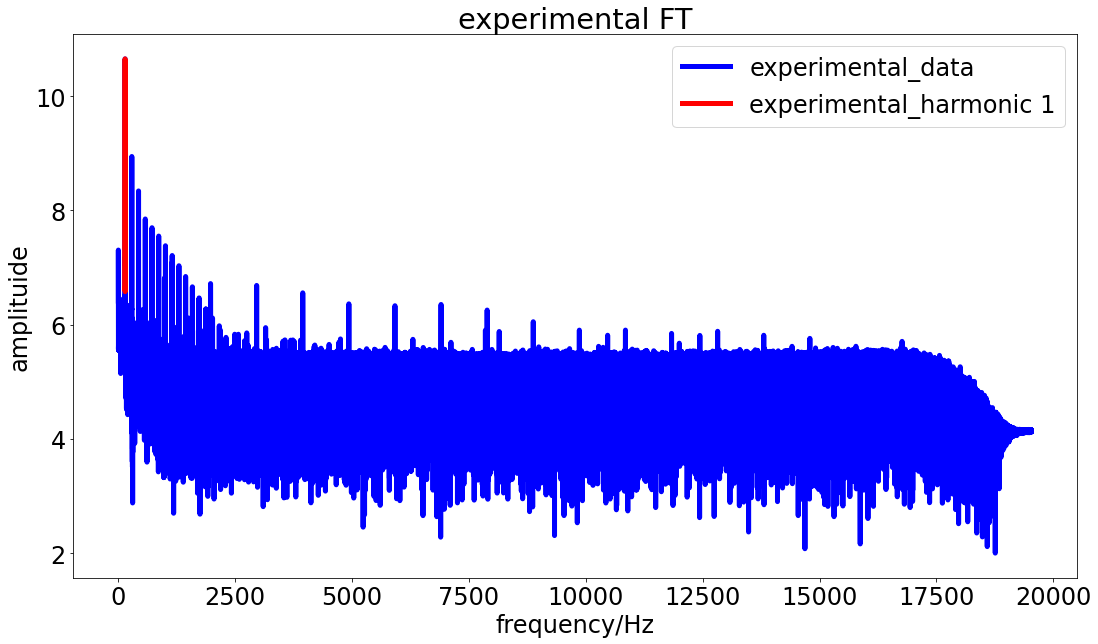

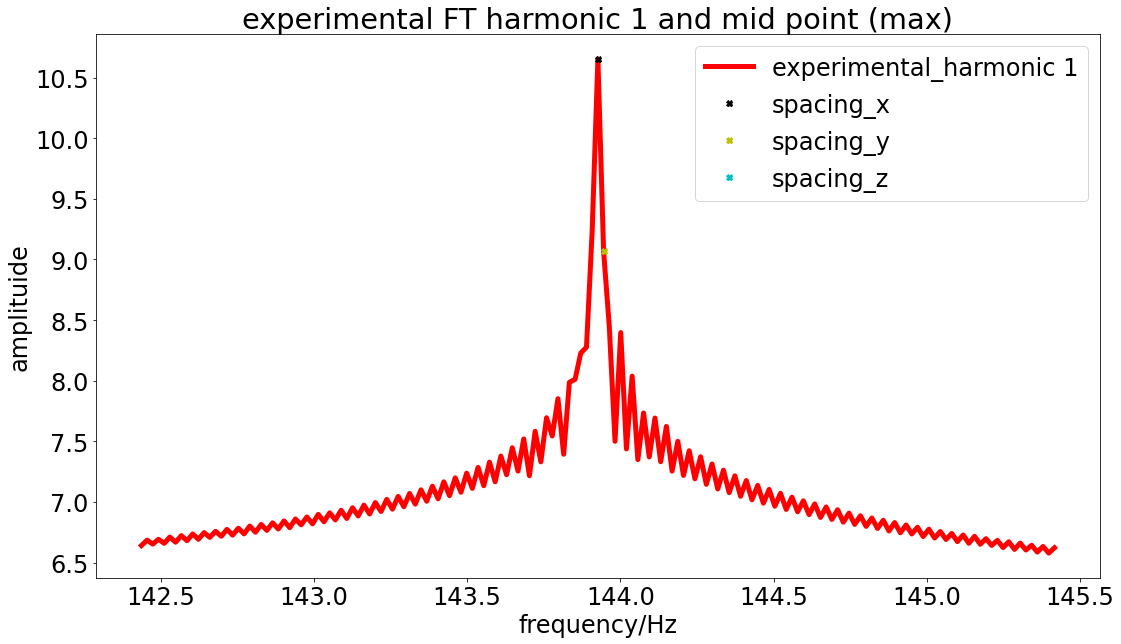

Spacing between harmonics:  7727

**********cacluating location of 4th harmonic**********
mid point index of 4th harmonic:  4694

**********index distance of 0.75Hz**********
index window covering 0.75Hz:  40.26528
int index window covering 0.75Hz:  40.0
sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


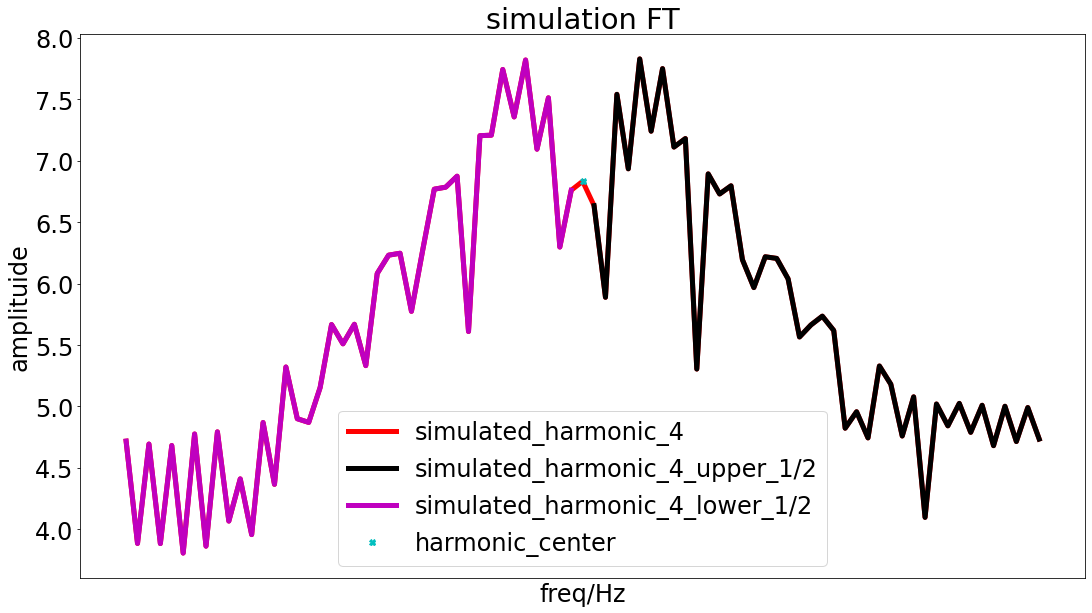

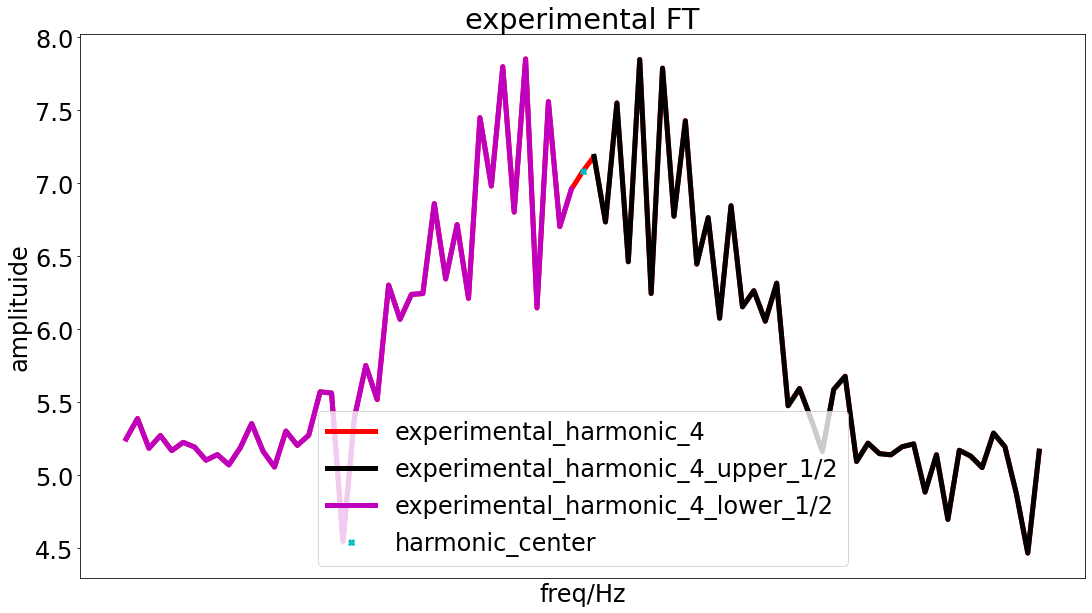

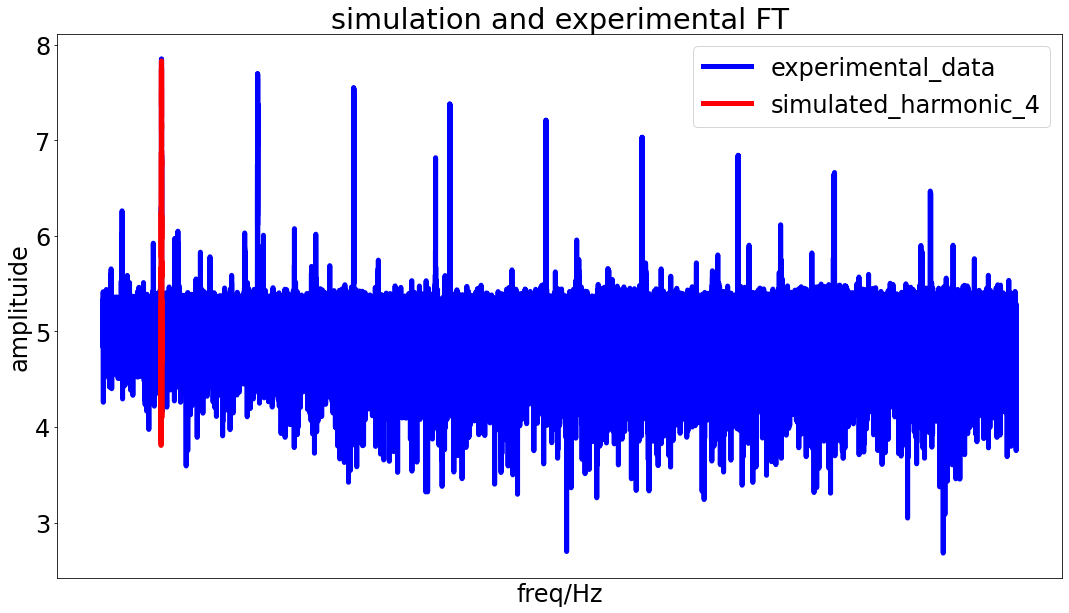

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


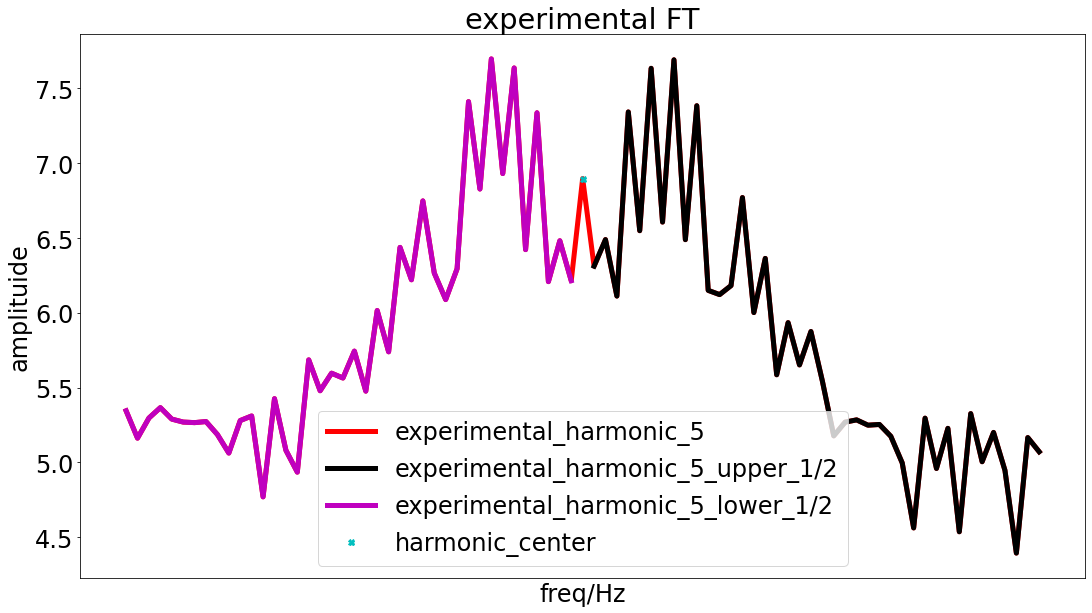

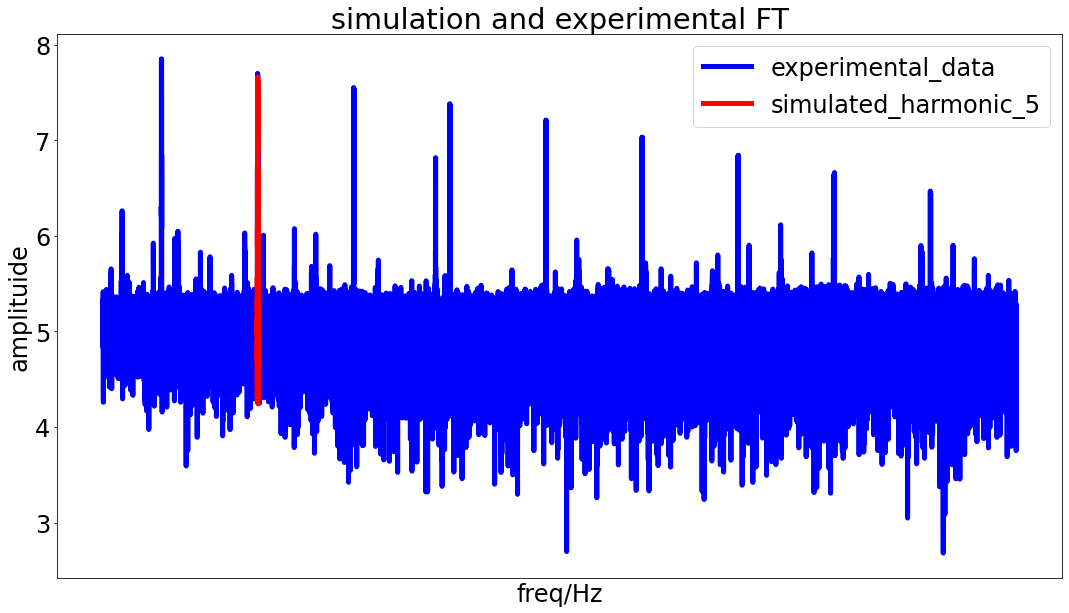

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


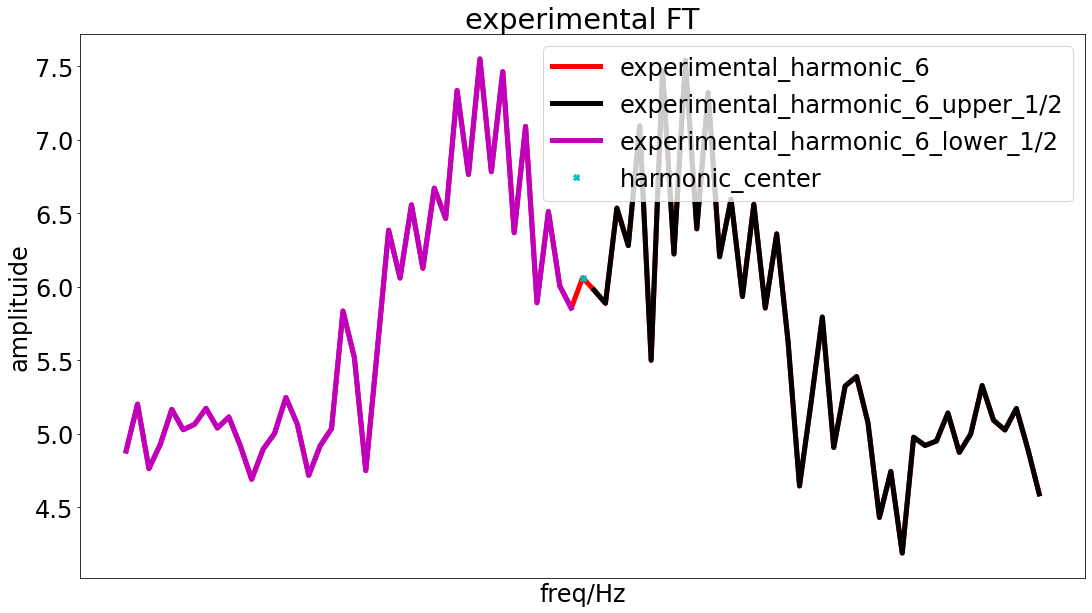

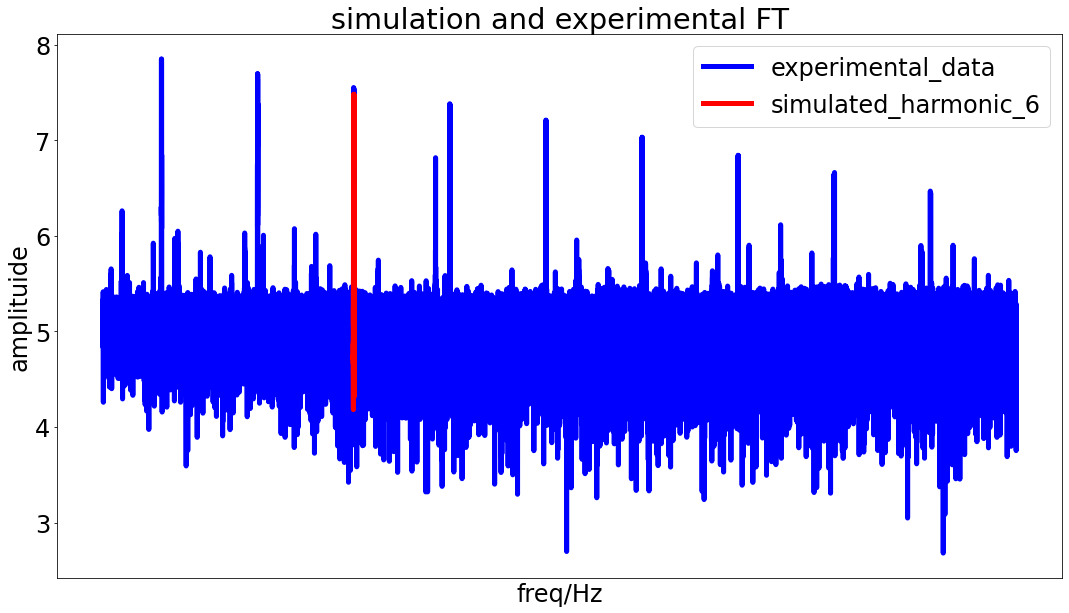

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


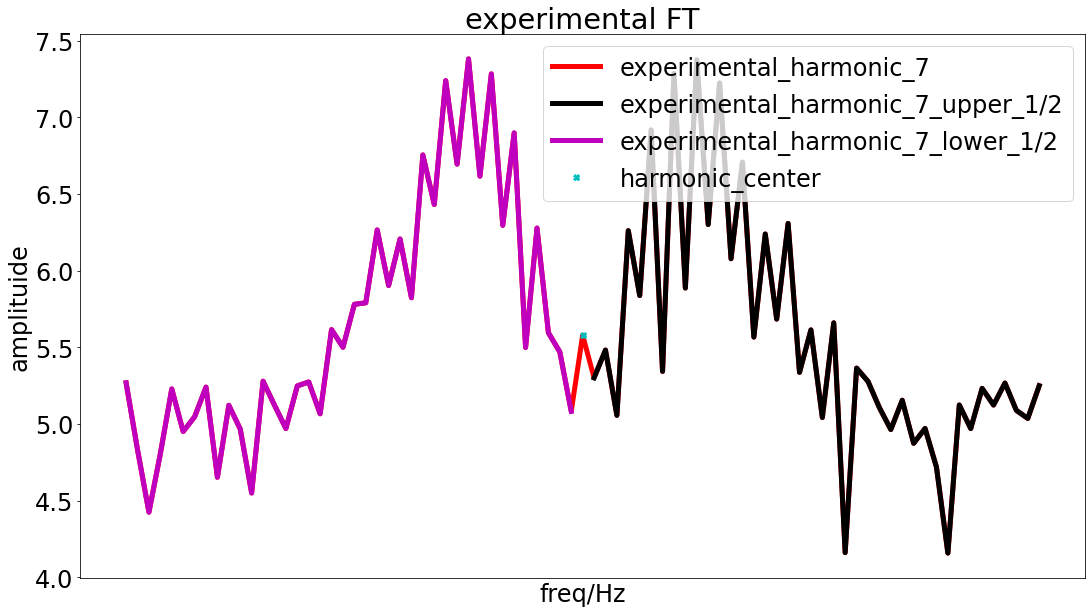

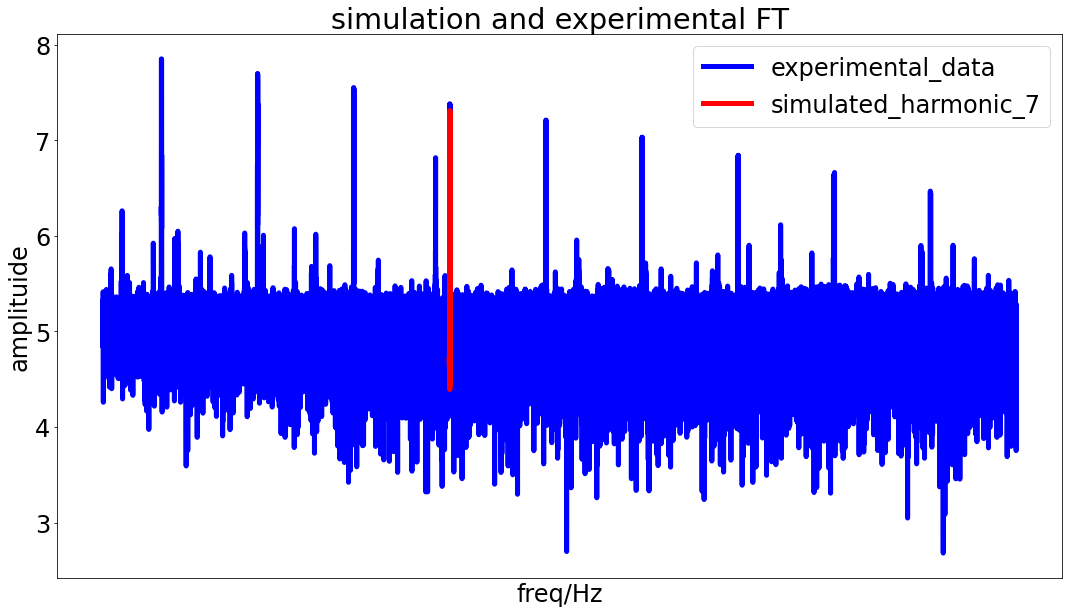

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


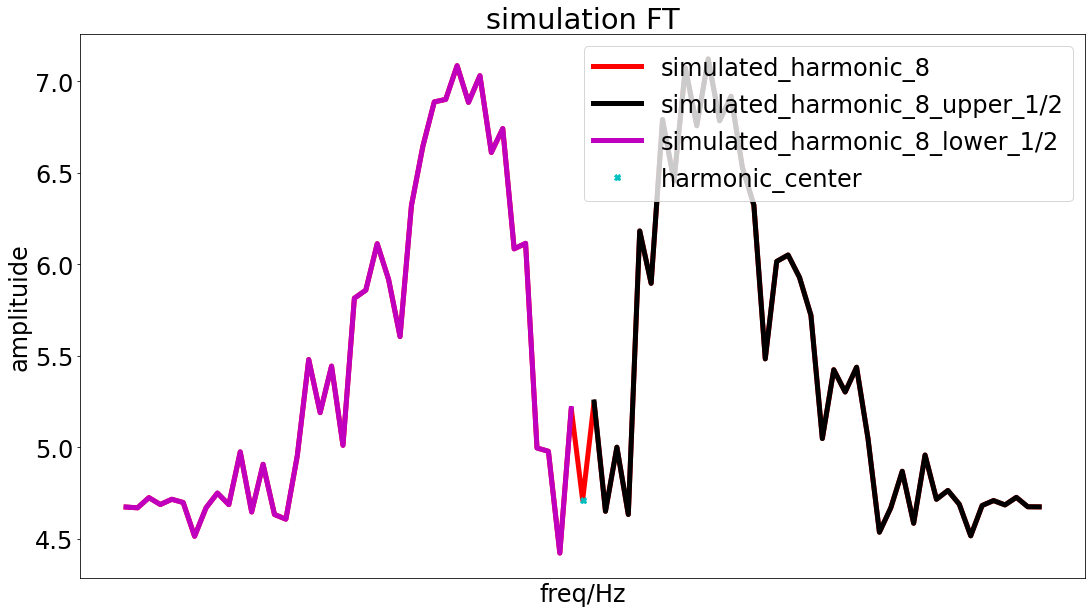

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


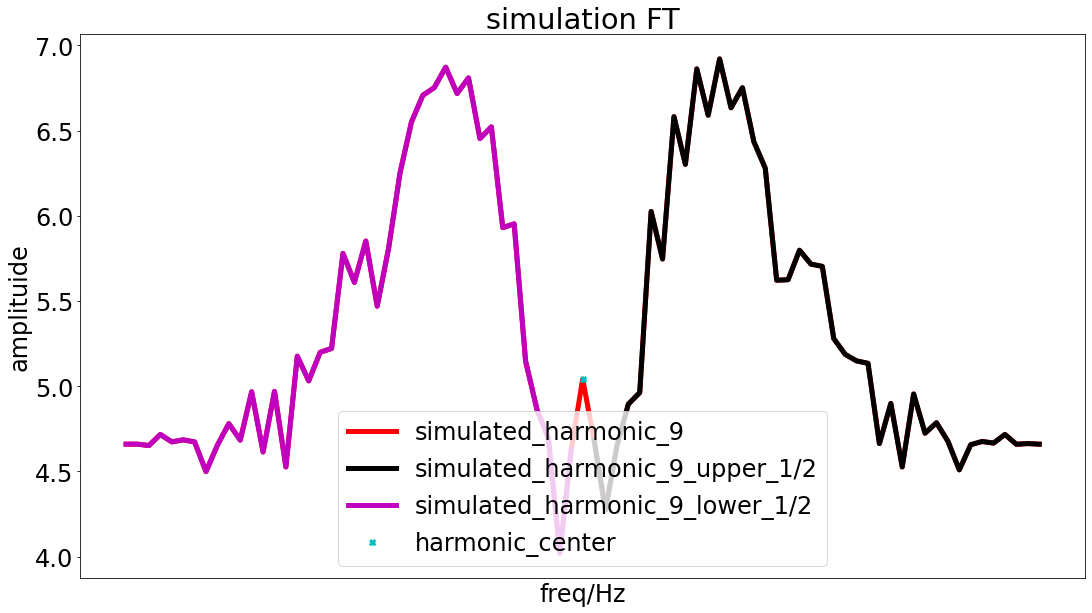

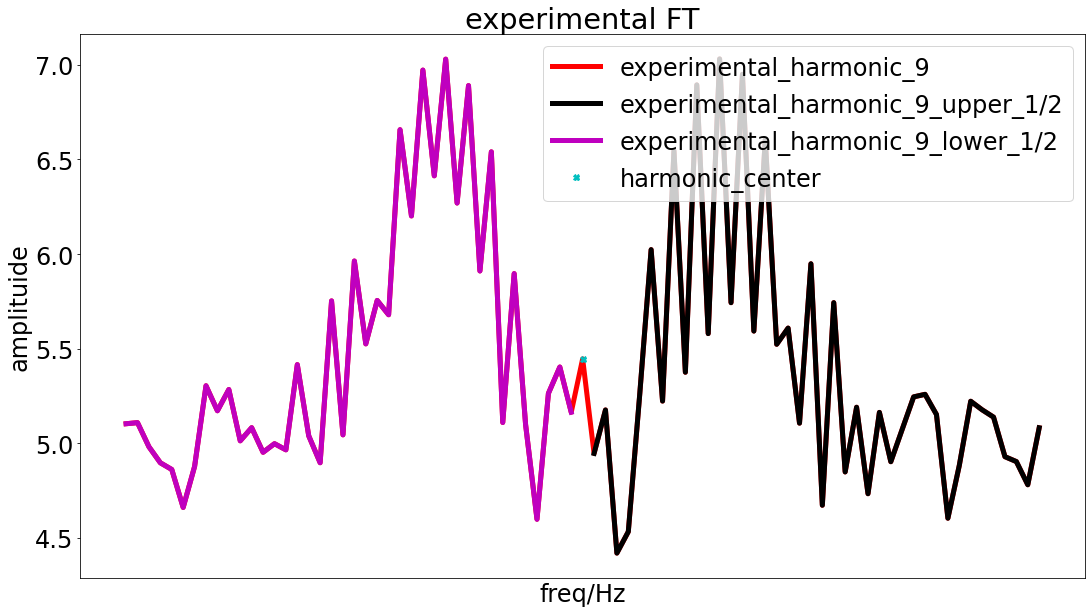

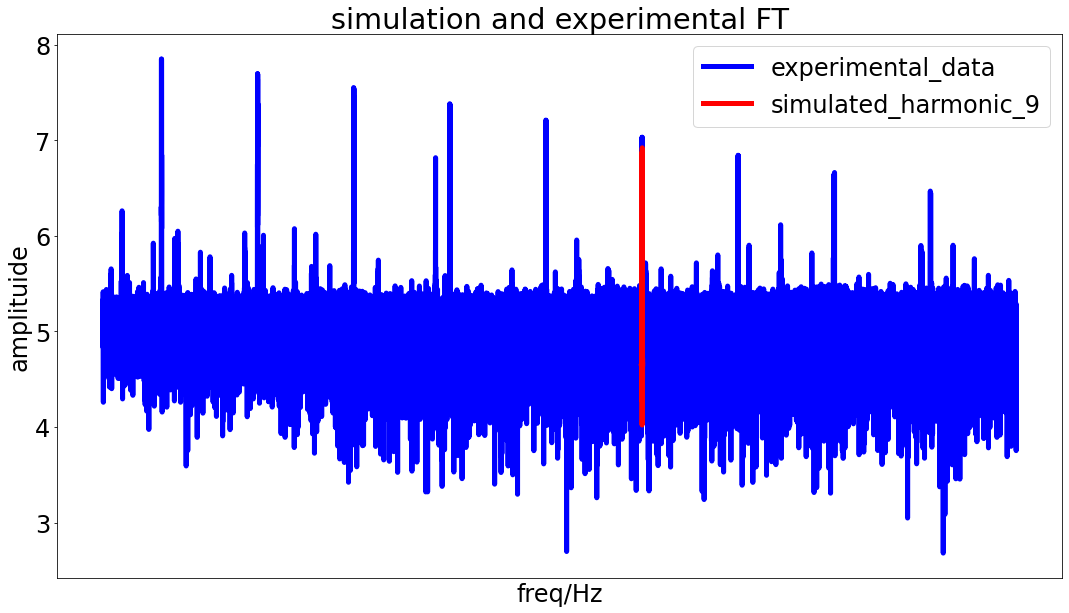

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


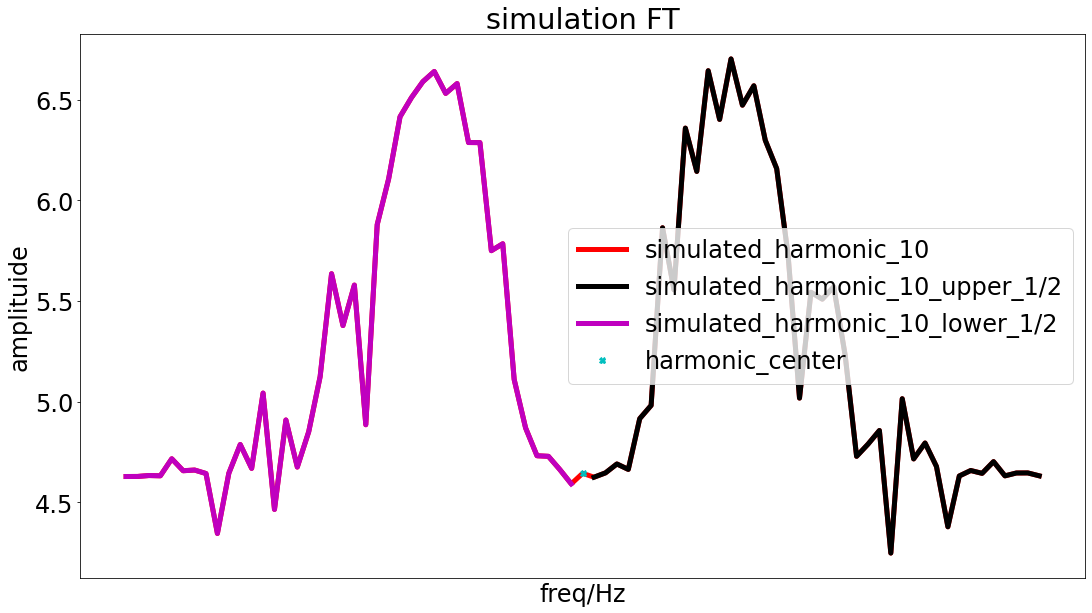

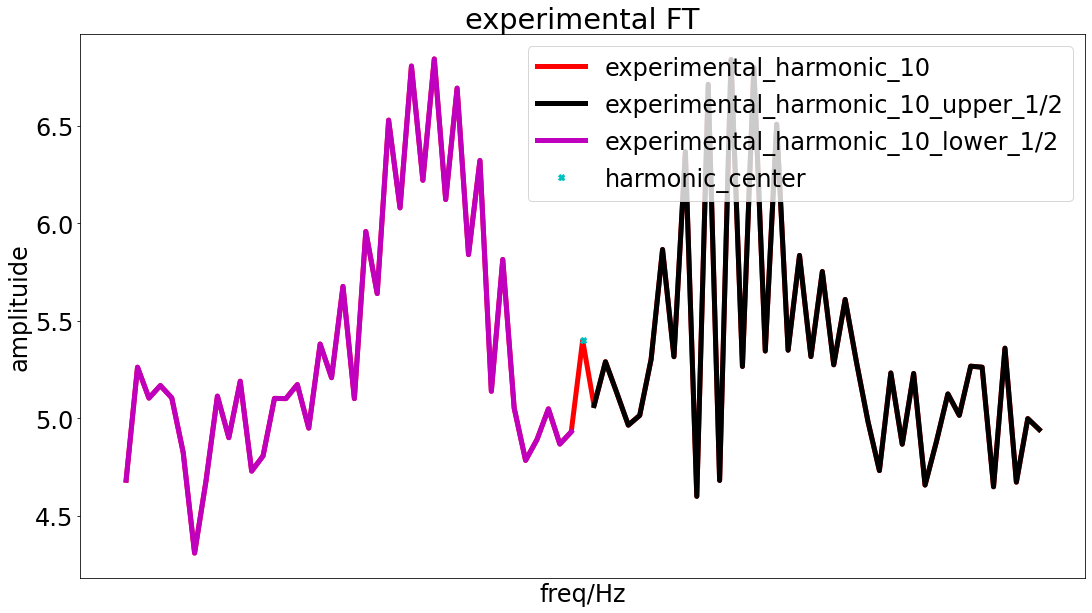

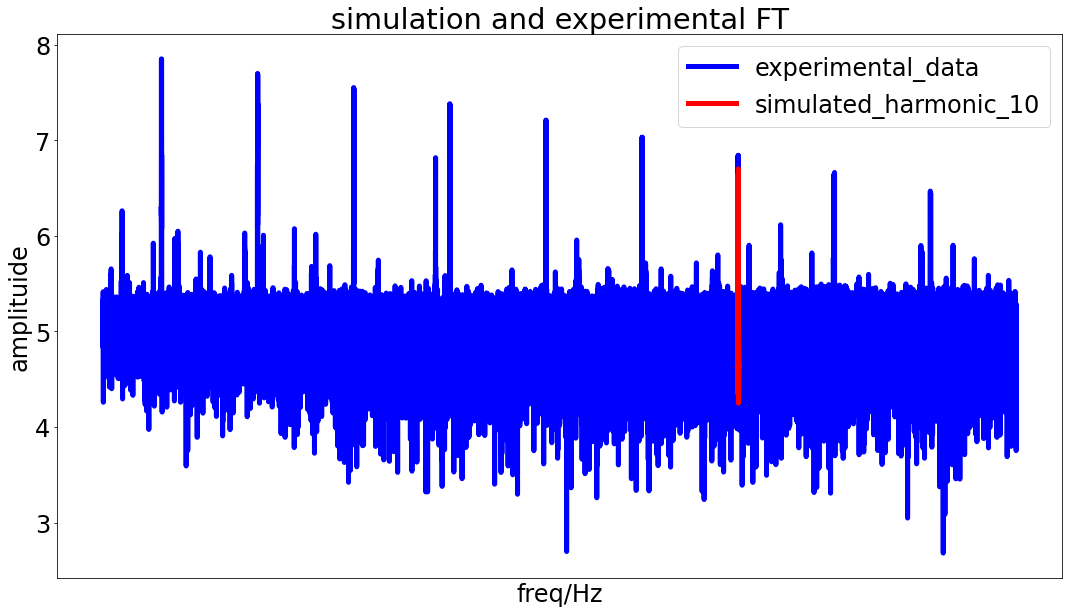

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


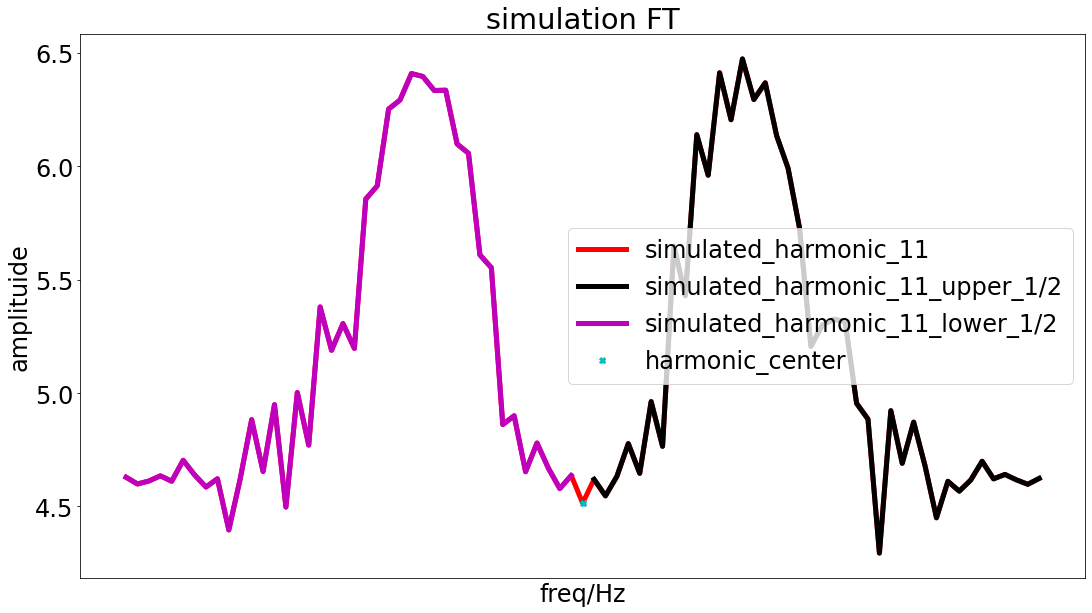

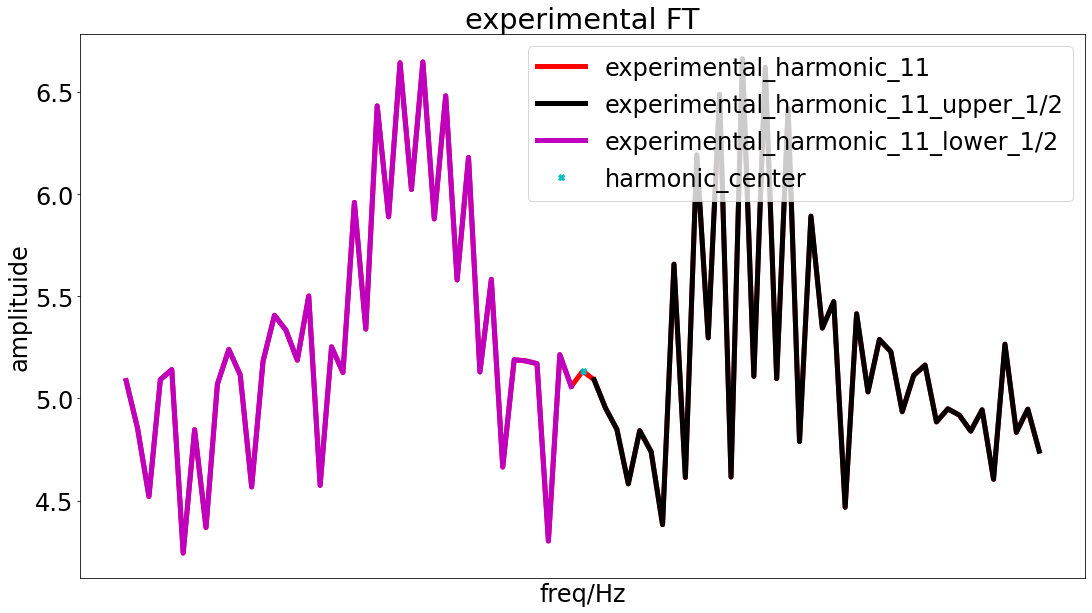

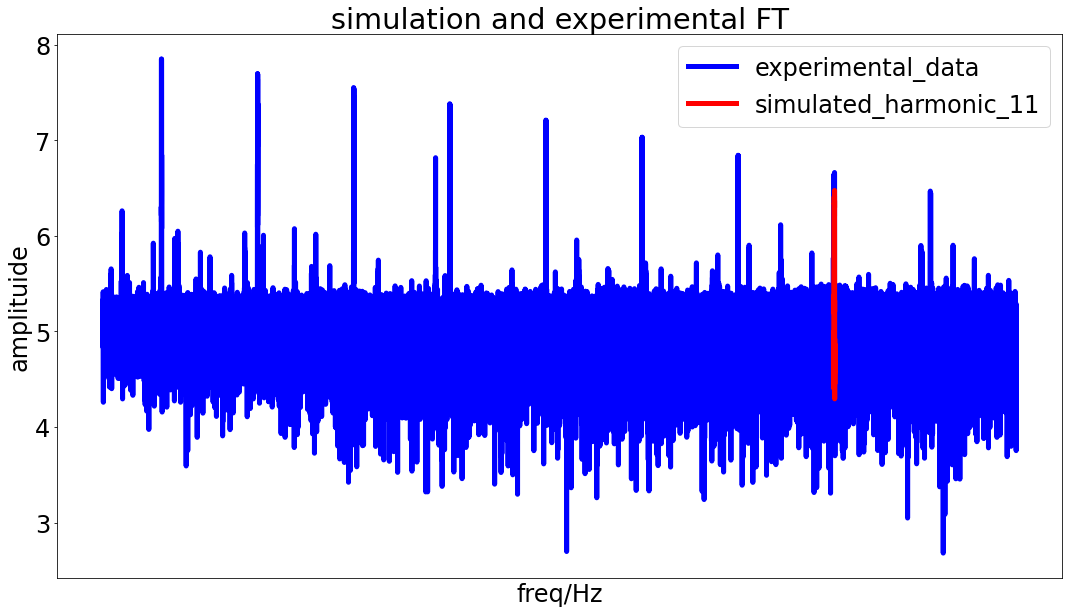

sim_plot.shape: (81,)
mid_upper_sim_plot.shape: (41,)
lower_sim_plot.shape: (40,)


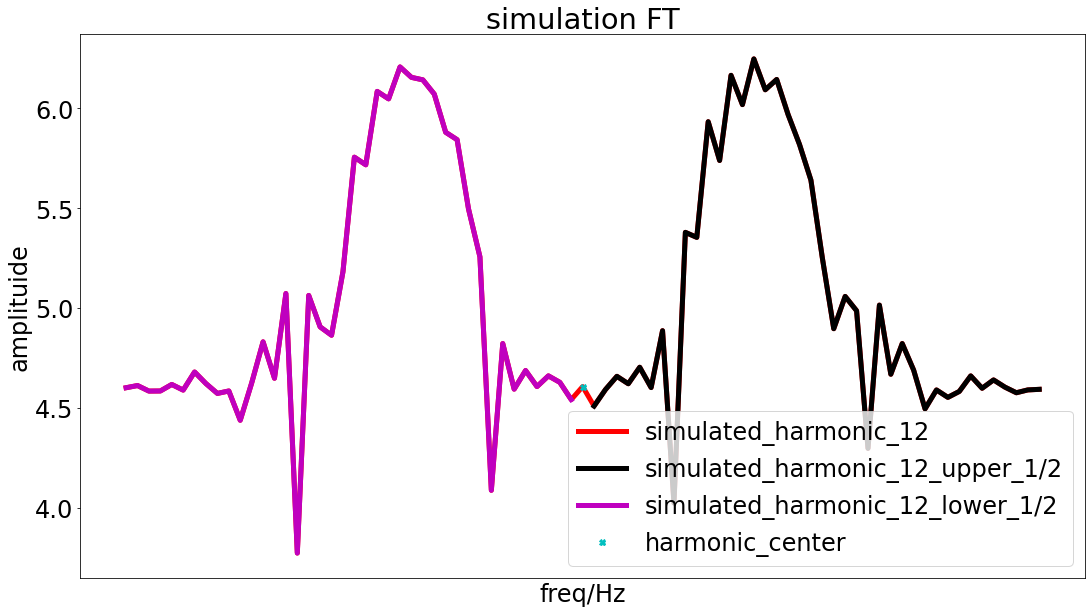

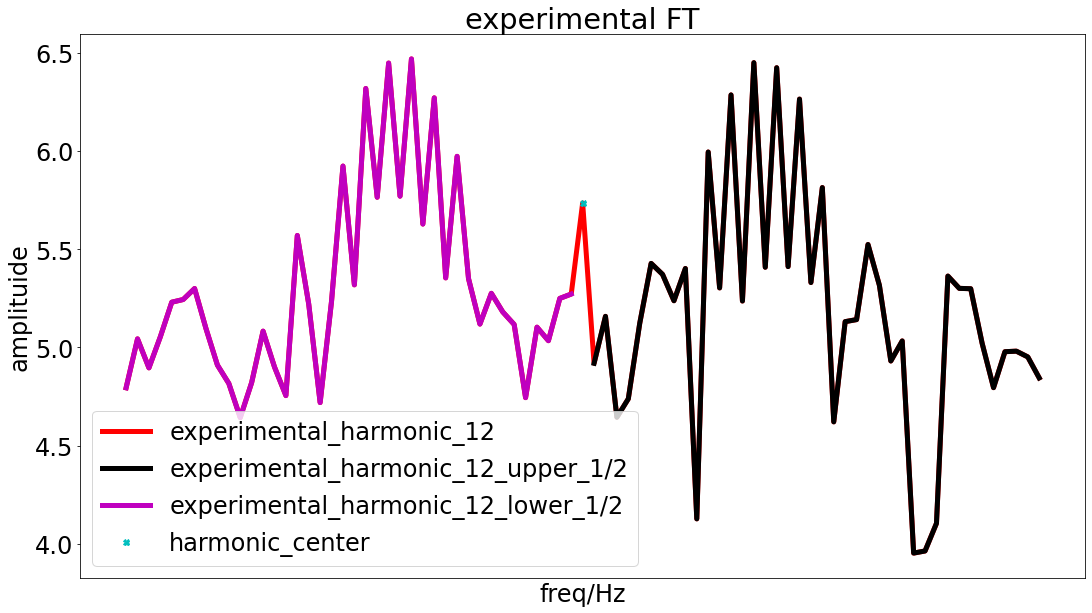

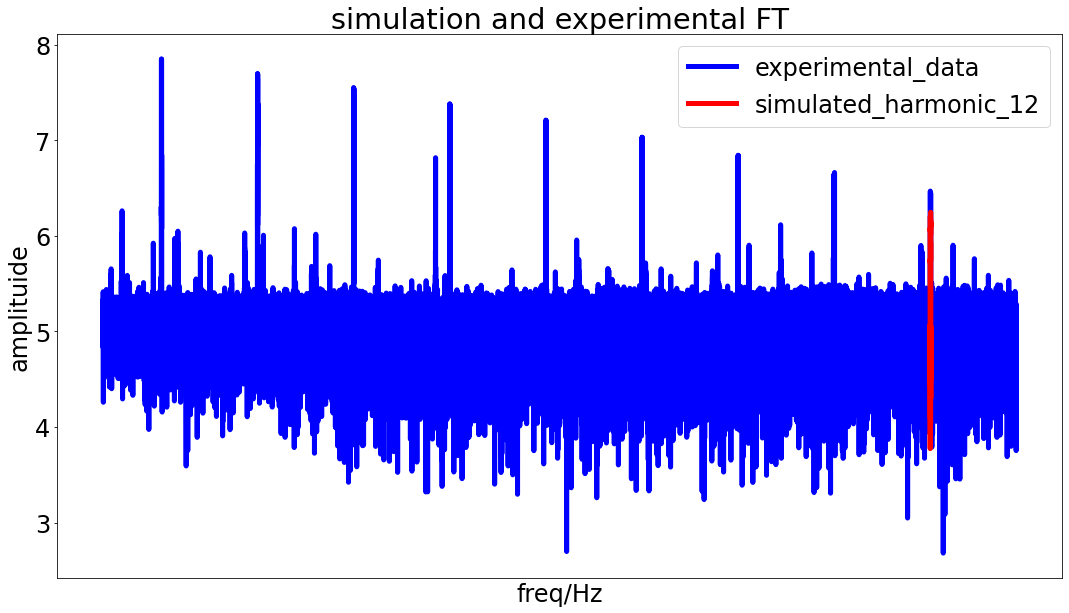

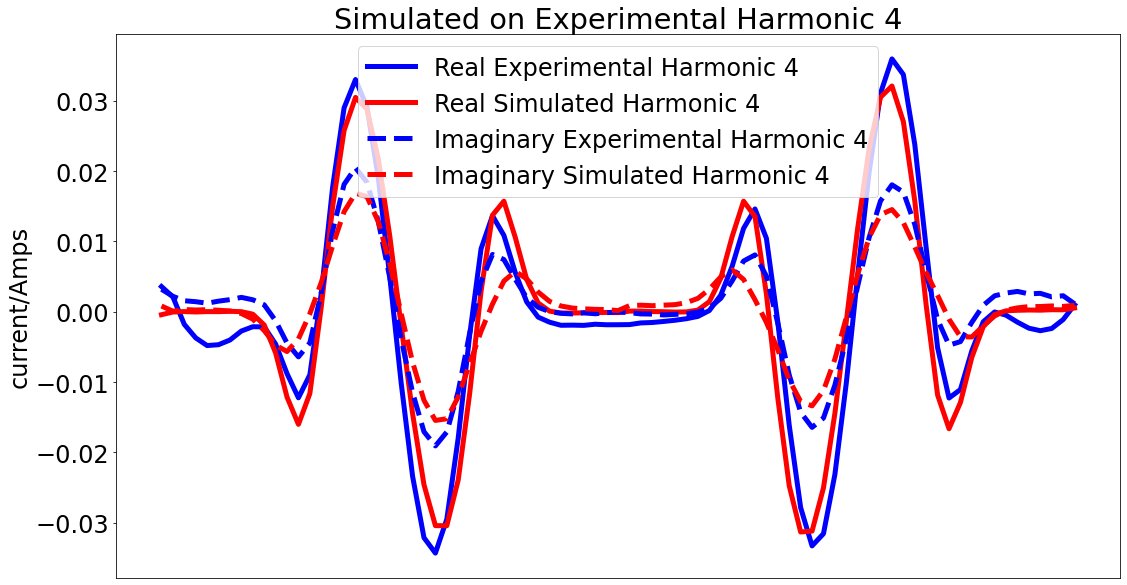

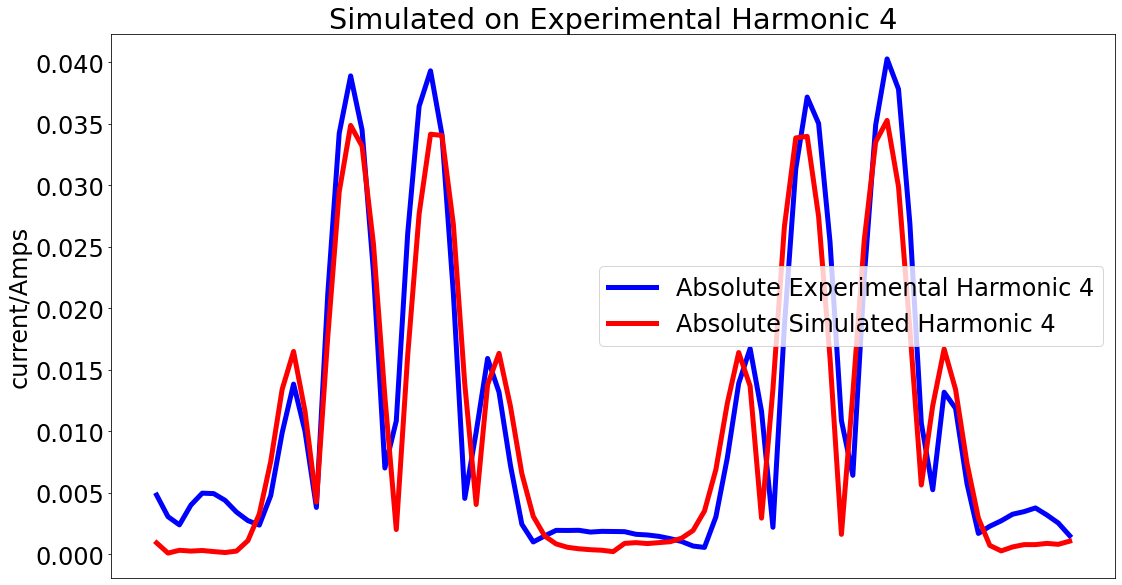

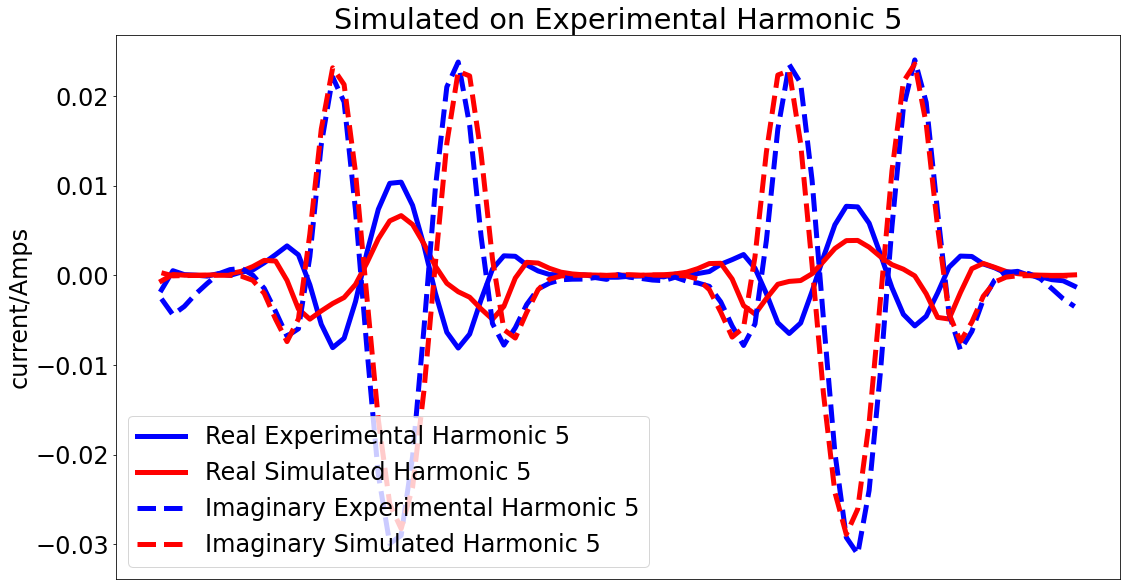

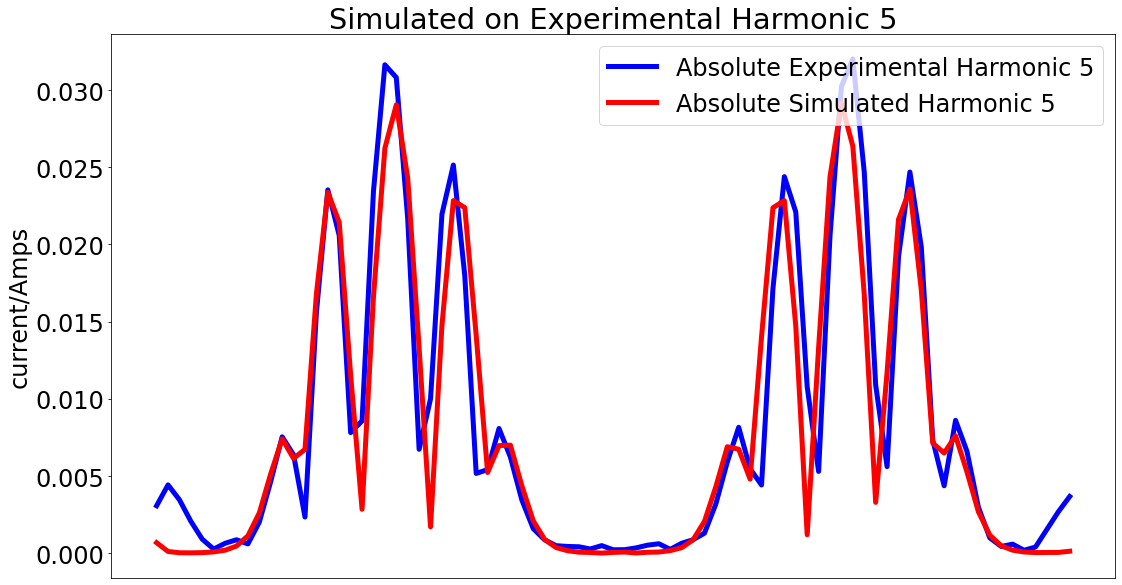

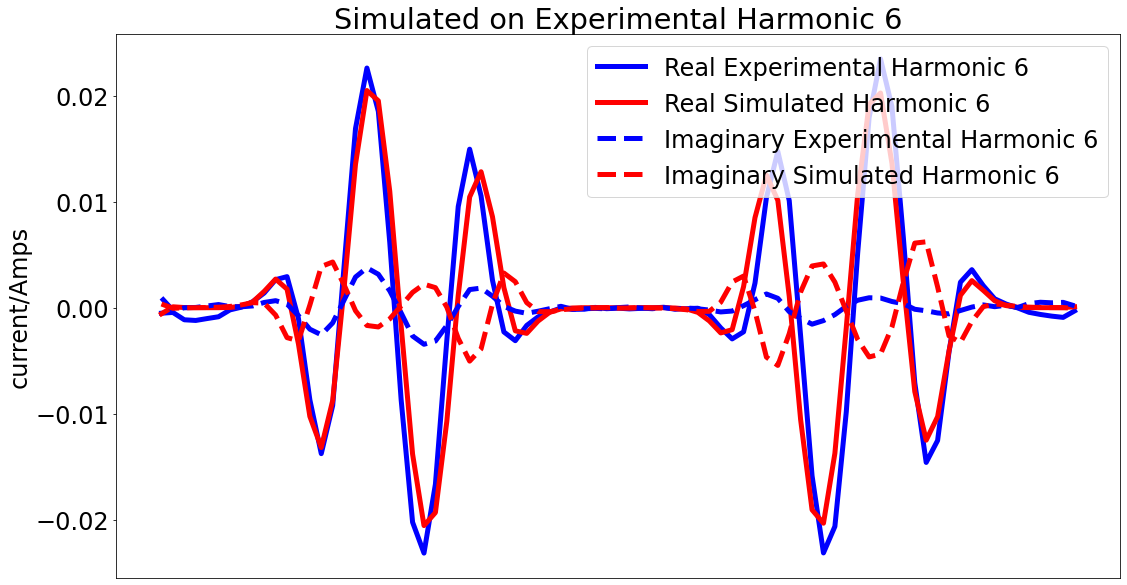

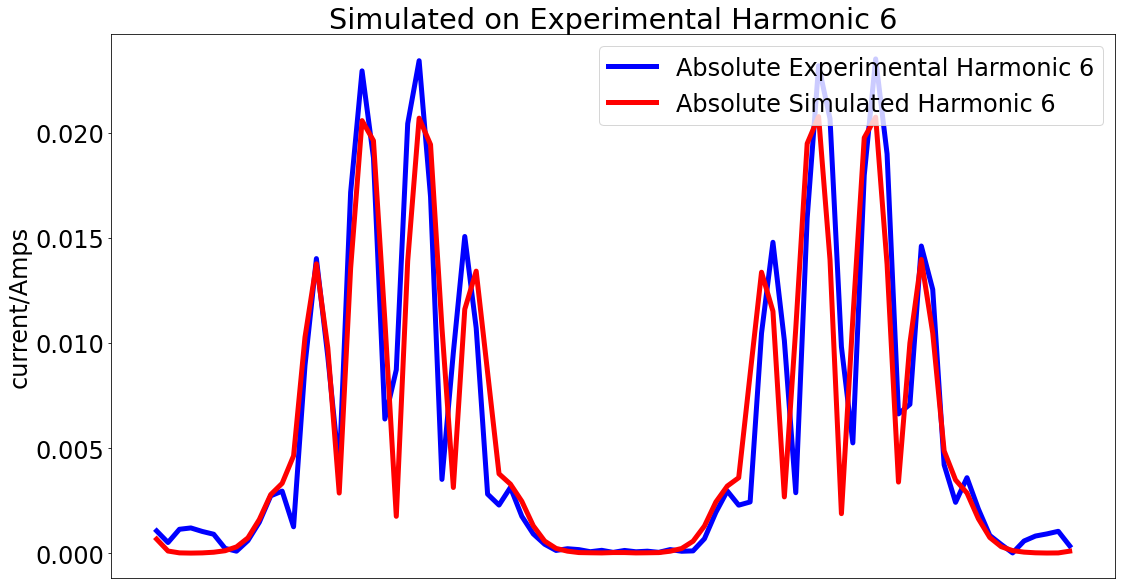

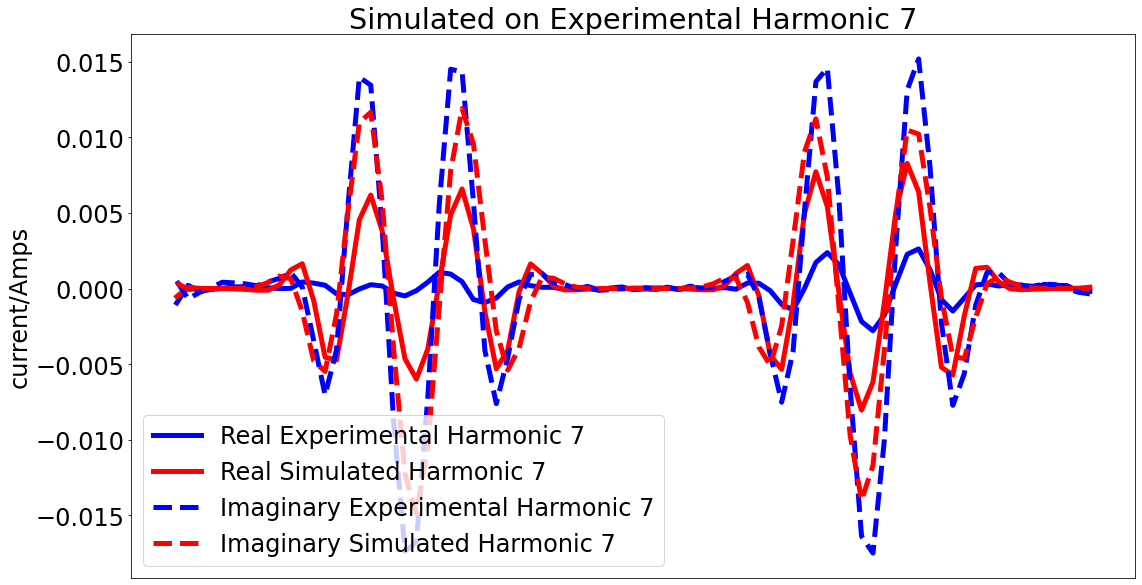

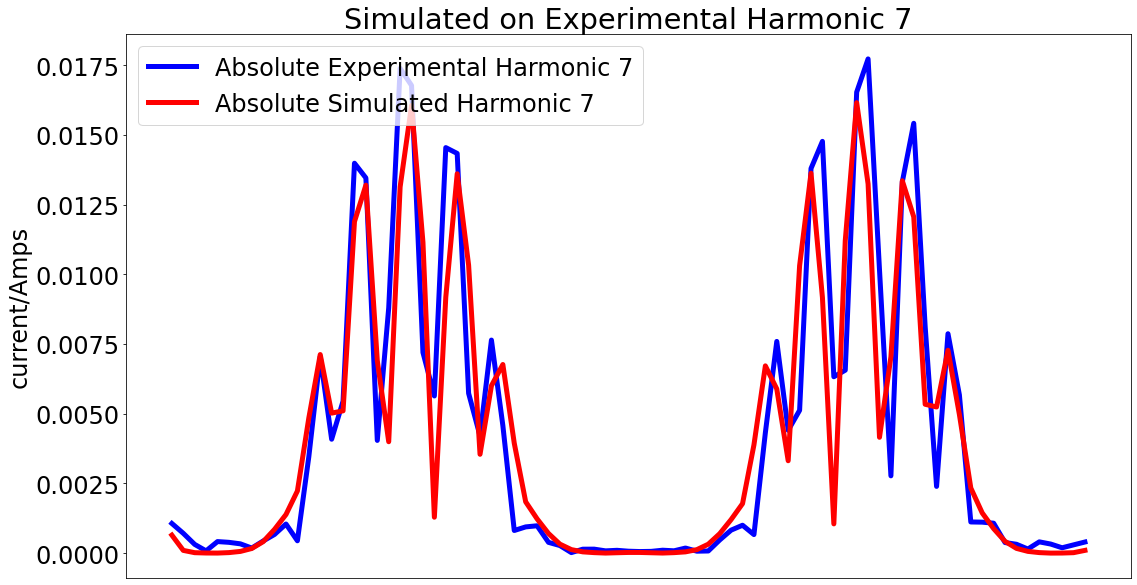

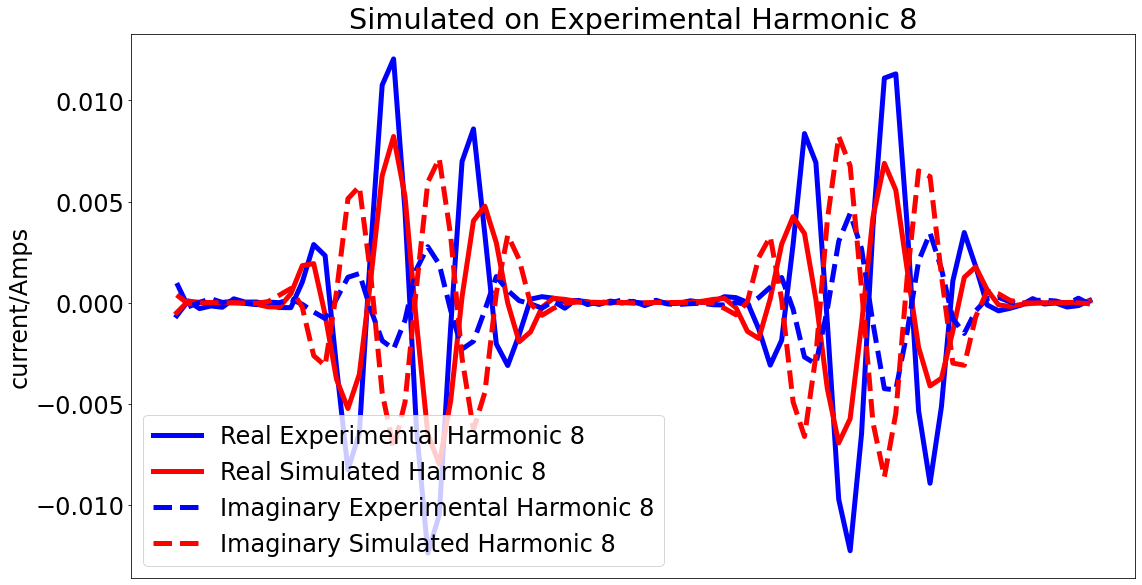

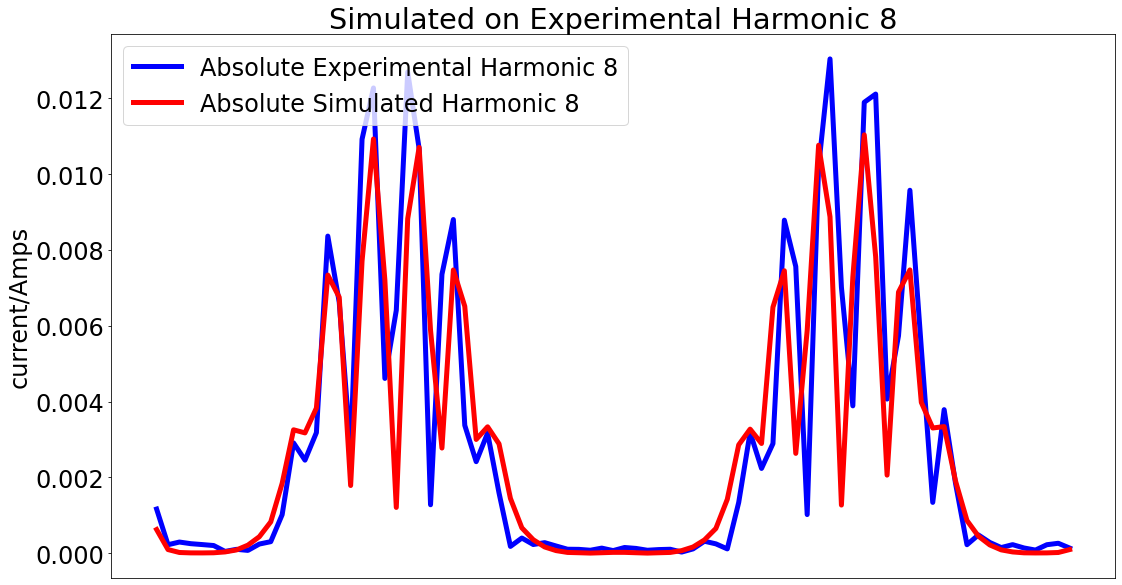

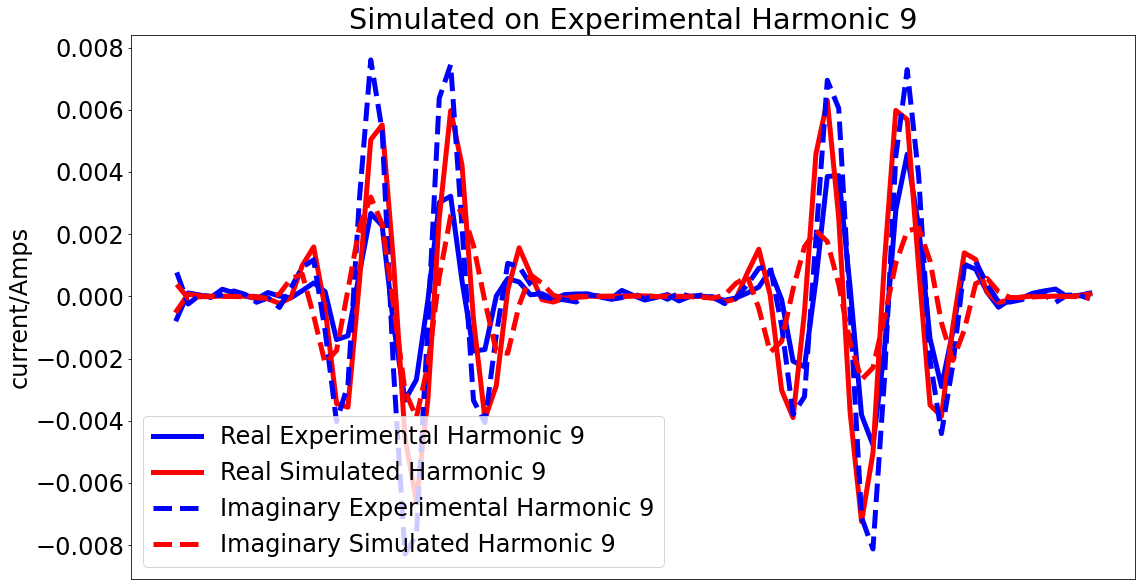

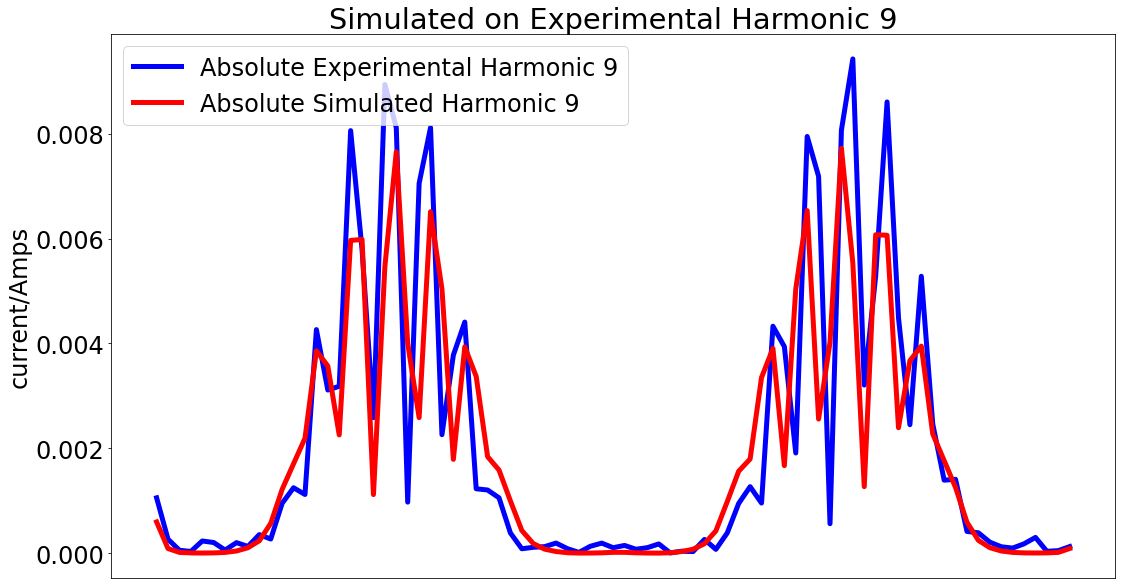

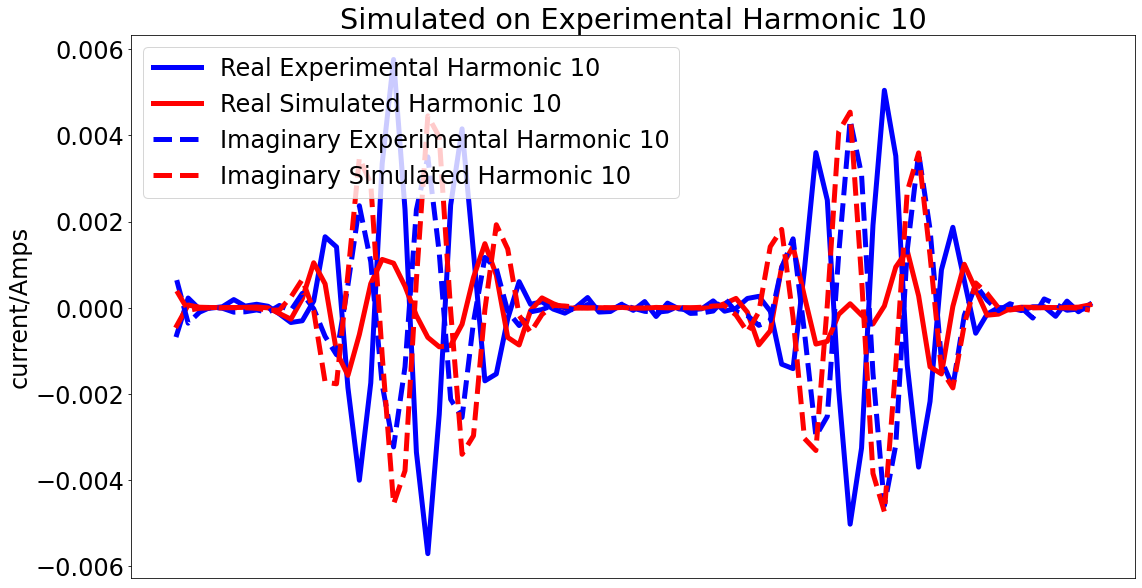

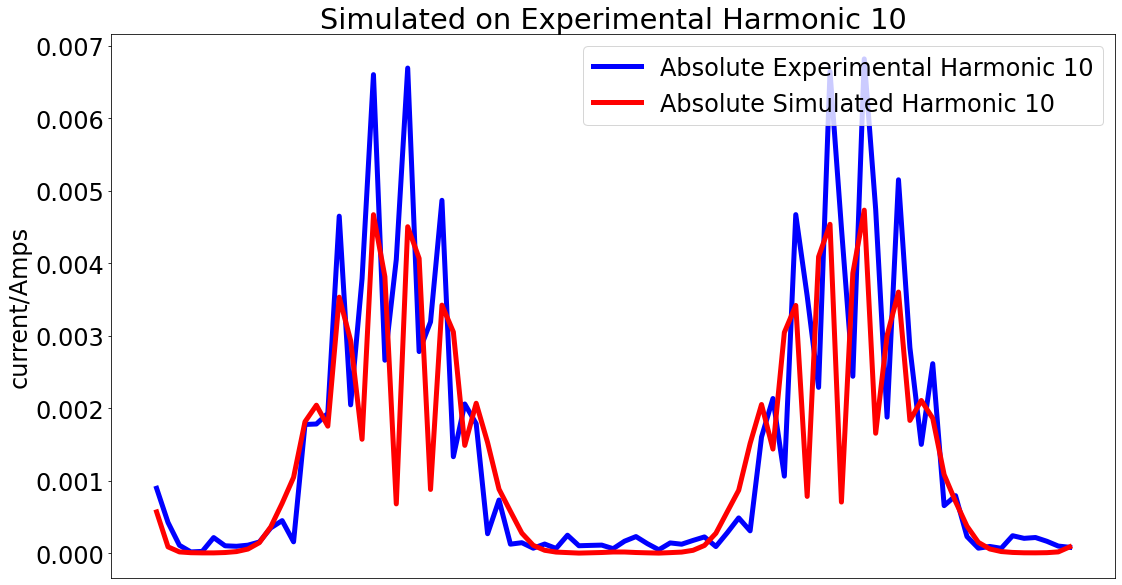

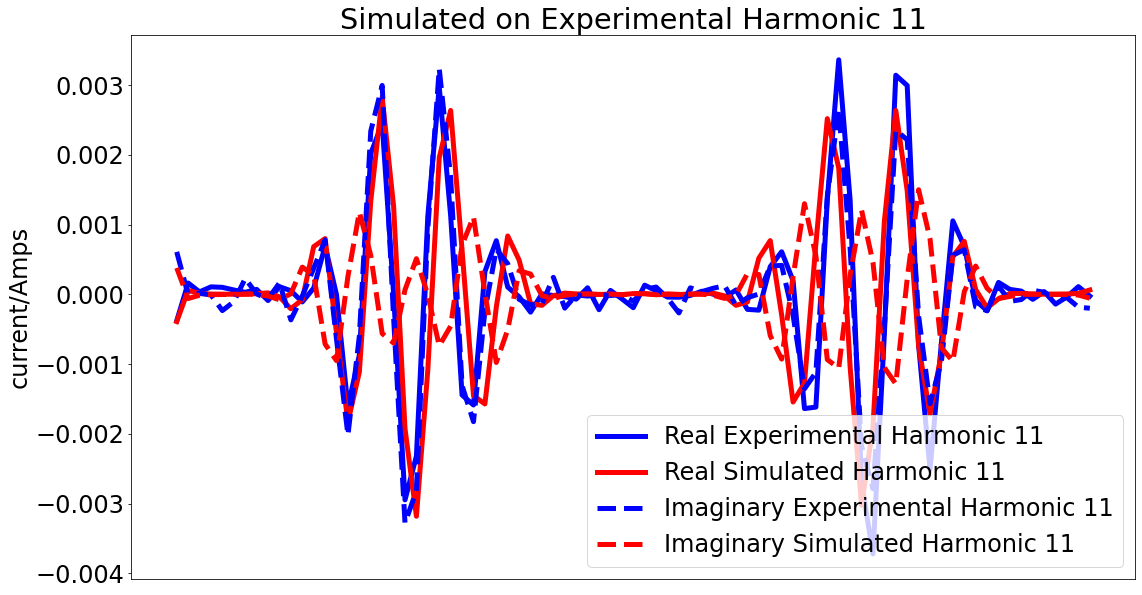

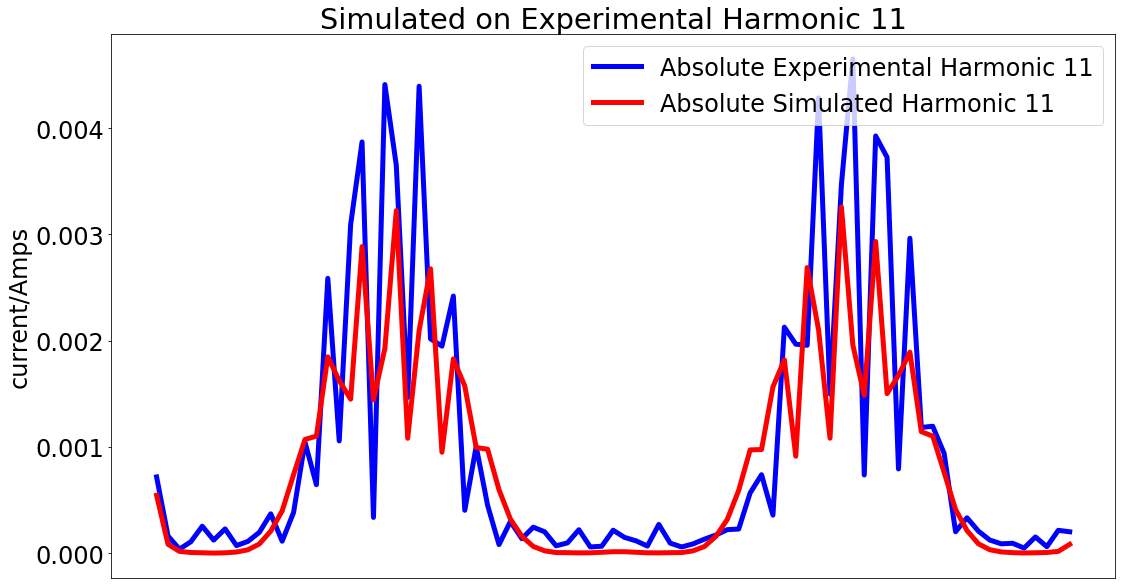

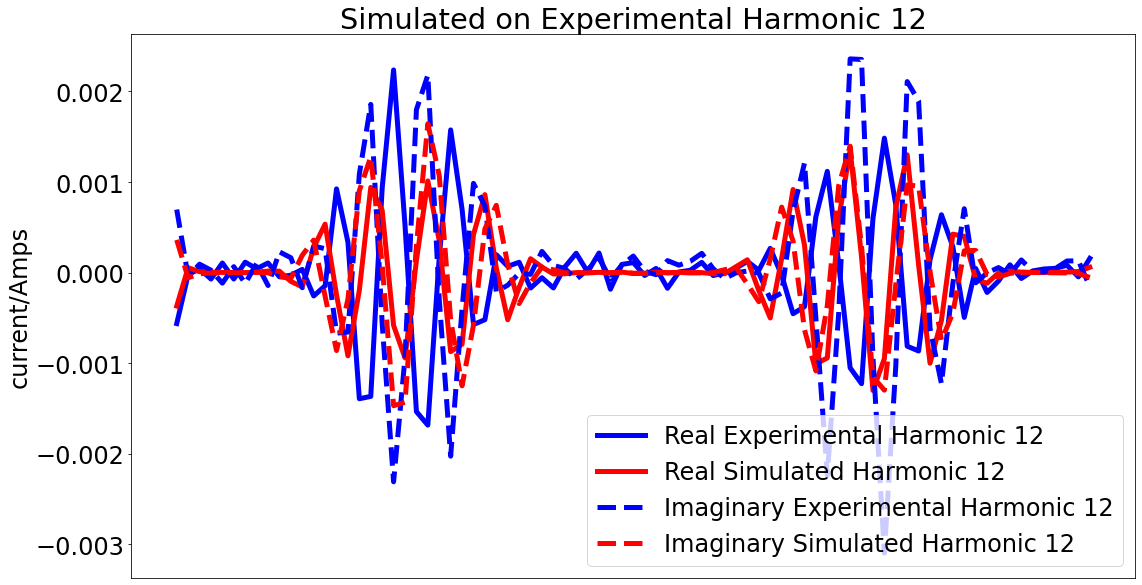

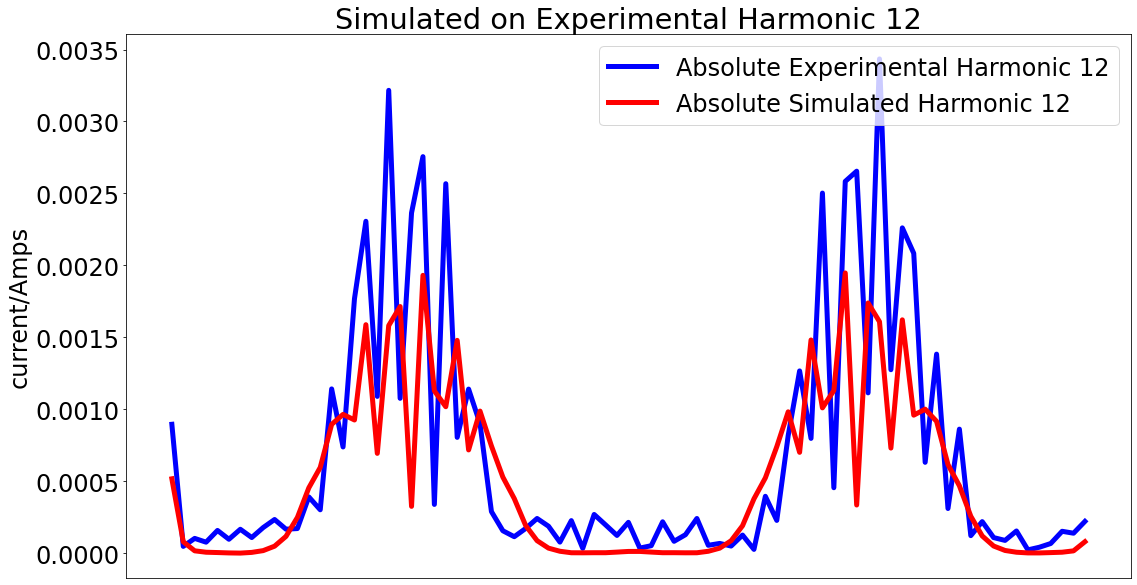

self.endPureCapatianceFor:  209715
self.beingPureCapitanceto:  209715


In [6]:
for index in range(0,4):

    freq = freq_list[index]
    Hz_interval = Hz_interval_list[index]

    data_name = data_file_names[index]
    file_name = data_name + '.txt'
    folder = os.path.join('Data', 'processed')
    folder = os.path.join(folder, '220415')
    folder = os.path.join(folder, Phfolder[index])
    folder = os.path.join(folder, 'ac')
    folder = os.path.join(folder, experiment_folder[index])
    folder = os.path.join(folder, 'experimental')
    data_file = os.path.join(folder, file_name)

    output_folder = os.path.join('Figures', 'Harmonics')
    output_folder = os.path.join(output_folder, set_folder[index])
    output_folder = os.path.join(output_folder, Phfolder[index])

    # opening data
    experimental_data = pd.read_csv(data_file, sep='\t')

    exp_times = np.asarray(experimental_data.time)
    exp_current = np.asarray(experimental_data.current)

    # know paramteres that are data specific
    inital_current = exp_current[index]
    startPotential= startPotential_list[index]
    revPotential = revPotential_list[index]
    uncomp_resis = uncomp_resis_list[index]

    # delacring capactiance parameters
    # (gamma0, gamma1, gamma2, gamma3, omega)
    cap_params = cap_params_list[index][:9]
    full_cap_params = cap_params_list[index][:]
    faradaic = faradaic_params[index][:]

    measurements = exp_current.shape[0]
    # print('measurements: ', measurements)
    # if measurements%2 !=0:
    #     print('*'*30+'\nerror must have evennumber of measurments\n'+'*'*40)

    # declaring model to obtain non dimensinalise constant
    trial = newtonRaphsonFT(timeStepSize=exp_times[1], inital_current=inital_current, freq=freq, startPotential= startPotential,
                            revPotential = revPotential,rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = measurements, 
                            deltaepislon=deltaepislon,uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage)

    # non-diming experimental data
    exp_current_dimless = exp_current/trial.I0

    # model for optimsation
    model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                            rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon,
                            uncomp_resis=uncomp_resis, electrode_area=electrode_area, electode_coverage=electode_coverage,
                            initaldiscard = initalDiscard_list[index], enddiscard = endDiscard_list[index], cap_params=cap_params)

    print_all_harmonics = False
    check_FT_harmonic_locations = True
    print_these_harmonics = [4,5,6,7,8,9,10,11,12]
    model.ploting_harmonic(experimental_data = exp_current_dimless, times = exp_times, parameter_for_sim = faradaic,
                           Hz_interval = Hz_interval, print_all_harmonics= print_all_harmonics, print_these_harmonics = print_these_harmonics,
                           check_FT_harmonic_locations = check_FT_harmonic_locations, print_harmonics = True, save_to = output_folder,
                           FirstAdjustment= FirstAdjustment_list[index], FourthAdjustment= FourthAdjustment_list[index])
    
    solution = model.simulate(faradaic, exp_times)
    plt.figure(figsize=(18,10))
    plt.title(Ph[index] +" optimised and experimental current")
    plt.ylabel("current/Amps")
    plt.xlabel('time/s')
    plt.plot(exp_times, exp_current,'r', label='experiment')
    plt.plot(exp_times ,solution*trial.I0,'b', label='optimised')
    plt.legend(loc='best')
    plt.savefig(os.path.join(output_folder, Ph[index] + ' optimised_on_experiment.pdf'))
    # plt.show()
    plt.close()

    cap_model = wrappedNewtonCap(times = exp_times, removed_measures_to_account_for = measured_removed_for_Int_periods, 
                         startPotential= startPotential, revPotential = revPotential,
                         rateOfPotentialChange = rateOfPotentialChange, inital_current=inital_current, freq=freq,
                         deltaepislon=deltaepislon, electrode_area=electrode_area, electode_coverage=electode_coverage,
                         beingPureCapitanceto = cap_regions, endPureCapatianceFor = cap_regions)

    cap_solution = cap_model.simulate(full_cap_params, exp_times)


    plt.figure(figsize=(18,10))
    plt.title(Ph[index] +" optimised capacitance current and experimental current")
    plt.ylabel("current/Amps")
    plt.xlabel('time/s')
    plt.plot(exp_times, exp_current,'r', label='experiment')
    plt.plot(exp_times ,cap_solution*trial.I0,'b', label='optimised')
    plt.legend(loc='best')
    plt.savefig(os.path.join(output_folder, Ph[index] + ' optimised_capacitance_on_experiment_data.pdf'))
    # plt.show()
    plt.close()

In [7]:
# # blanks

# # specifing data location and folder for outputs

# data_name = '9 150_2_cv_current_downsampled_0'
# file_name = data_name + '.txt'
# folder = os.path.join('Data', 'processed')
# folder = os.path.join(folder, '220415')
# folder = os.path.join(folder, 'ph9 2m nacl 25oC')
# folder = os.path.join(folder, 'blank')
# folder = os.path.join(folder, '9 150_2')
# data_file = os.path.join(folder, file_name)
# Ph ='Ph9'
#  # opening data
# experimental_data = pd.read_csv(data_file, sep='\t')

# exp_times = np.asarray(experimental_data.time)
# exp_current = np.asarray(experimental_data.current)

# plt.figure(figsize=(18,10))
# plt.title(Ph +" optimised and experimental current")
# plt.ylabel("current/Amps")
# plt.xlabel('time/s')
# plt.plot(exp_times, exp_current,'r', label='experiment')
# plt.legend(loc='best')
# plt.savefig(Ph+ '_blank_experiment.pdf')
# plt.show()
# plt.close()